## Cryptocurrency Trading Strategy in 2017

**Step 1**:  import libraries

In [290]:
#import libraries
import pandas as pd

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from matplotlib.finance import candlestick_ohlc

from datetime import datetime

**Step 2**:  Create dataframe for closing prices data for Bitcoin, Ethereum, and Litecoin.  The columns used are:

1. Date:  Price date
2. Close:  USD Price at 11:59 PM (since this is a 24 hour market)  

To load the closing prices, I created a function, **load_close** to load the data to a data frame.  Then, I join the files using pd.merge().



In [291]:
def load_close(file_name,crypto_name, start_date):
    '''
    input : file_name with cryptocurrency prices and crypto name (BTC, ETH, LTC), and start date of data
    output:  dataframe with Date and daily close      
    '''
    #list of column names
    cols = ['Date',crypto_name + ' Close']
    data = pd.read_csv(file_name, usecols=['Date','Close'], parse_dates=['Date'])  
    #data = pd.read_csv(file_name, usecols=['Date','Close'])  
    data.columns = cols
    data_sorted = data.sort_values(by='Date')
    mask = (data_sorted['Date'] >= start_date)
    data_sorted_from_start_date = data_sorted[data_sorted.columns[:2]].loc[mask]

    return data_sorted_from_start_date

In [292]:
#create data frames with closing prices for each crypto
df_btc_sorted = load_close('bitcoin_price.csv','BTC','2017-01-01')
df_eth_sorted = load_close('ethereum_price.csv','ETH','2017-01-01')
df_ltc_sorted = load_close('litecoin_price.csv','LTC','2017-01-01')

#join tables on date (first bitcoin and ethereum and then the first joined table to litecoin)
df_btc_eth = pd.merge(df_btc_sorted, df_eth_sorted, on='Date', how='outer')
df_btc_eth_ltc = pd.merge(df_btc_eth, df_ltc_sorted, on='Date', how='outer')
df_btc_eth_ltc.head()

,Date,BTC Close,ETH Close,LTC Close
0,2017-01-01,998.33,8.17,4.51
1,2017-01-02,1021.75,8.38,4.65
2,2017-01-03,1043.84,9.73,4.63
3,2017-01-04,1154.73,11.25,4.84
4,2017-01-05,1013.38,10.25,4.29


**Step 3**:  Normalize the prices.  There are 2 ways this was performed:

1. In terms of a \$1 investment from the beginning of the period 
2. Scale the price so that the minimum price is 0 and the maximum price is 1

I also added an additional comment to see the investment value assuming a \$20,000 investment on Jan 1st, 2017.

In [293]:
#normalization based on $1 investment in each
df_btc_eth_ltc['BTC Close normalized 1'] = df_btc_eth_ltc['BTC Close']/df_btc_eth_ltc['BTC Close'].iloc[0]
df_btc_eth_ltc['ETH Close normalized 1'] = df_btc_eth_ltc['ETH Close']/df_btc_eth_ltc['ETH Close'].iloc[0]
df_btc_eth_ltc['LTC Close normalized 1'] = df_btc_eth_ltc['LTC Close']/df_btc_eth_ltc['LTC Close'].iloc[0]

#add normalized price so that price is between 0 and 1
df_btc_eth_ltc['BTC Close normalized 2'] = (df_btc_eth_ltc['BTC Close'] -  df_btc_eth_ltc['BTC Close'].min())/(df_btc_eth_ltc['BTC Close'].max() - df_btc_eth_ltc['BTC Close'].min())
df_btc_eth_ltc['ETH Close normalized 2'] = (df_btc_eth_ltc['ETH Close'] -  df_btc_eth_ltc['ETH Close'].min())/(df_btc_eth_ltc['ETH Close'].max() - df_btc_eth_ltc['ETH Close'].min())
df_btc_eth_ltc['LTC Close normalized 2'] = (df_btc_eth_ltc['LTC Close'] -  df_btc_eth_ltc['LTC Close'].min())/(df_btc_eth_ltc['LTC Close'].max() - df_btc_eth_ltc['LTC Close'].min())

#add column for $20,000 investment
df_btc_eth_ltc['btc_twenty_k_investment'] = df_btc_eth_ltc['BTC Close normalized 1']*20000
df_btc_eth_ltc['eth_twenty_k_investment'] = df_btc_eth_ltc['ETH Close normalized 1']*20000
df_btc_eth_ltc['ltc_twenty_k_investment'] = df_btc_eth_ltc['LTC Close normalized 1']*20000

#final normalized table (all)
df = df_btc_eth_ltc[['Date','BTC Close normalized 1','ETH Close normalized 1','LTC Close normalized 1','BTC Close normalized 2','ETH Close normalized 2','LTC Close normalized 2','btc_twenty_k_investment','eth_twenty_k_investment','ltc_twenty_k_investment']]
df.head()

,Date,BTC Close normalized 1,ETH Close normalized 1,LTC Close normalized 1,BTC Close normalized 2,ETH Close normalized 2,LTC Close normalized 2,btc_twenty_k_investment,eth_twenty_k_investment,ltc_twenty_k_investment
0,2017-01-01,1.000000,1.000000,1.000000,0.033270,0.000000,0.009717,20000.000000,20000.000000,20000.000000
1,2017-01-02,1.023459,1.025704,1.031042,0.036803,0.000534,0.011417,20469.183537,20514.075887,20620.842572
2,2017-01-03,1.045586,1.190942,1.026608,0.040135,0.003966,0.011175,20911.722577,23818.849449,20532.150776
3,2017-01-04,1.156662,1.376989,1.073171,0.056861,0.007831,0.013725,23133.232498,27539.779682,21463.414634
4,2017-01-05,1.015075,1.254590,0.951220,0.035540,0.005288,0.007045,20301.503511,25091.799266,19024.390244


### Question 1:  When did each cryptocurrency "take off"?
Overall, there was no bad time to buy any of these 3 as \$1 investment in each was worth between \$7 and \$36 over the 11 month period through 2017.  However, the winner was Ethereum.  The $1 investment in Ethereum began to diverge from the other 2 around March, 2017.  During that period, Bitcoin and Litecoin investments remained relatively flat until Litecoin separated from Bitcoin around April, 2017.Over the year, an investment in Bitcoin steadily rose and had less swings in value compared to the other two.

I've highlighted 3 periods of interest based on the sharp rise in value over these periods.  I'll explore these further to see how they ranked overall on the entire year

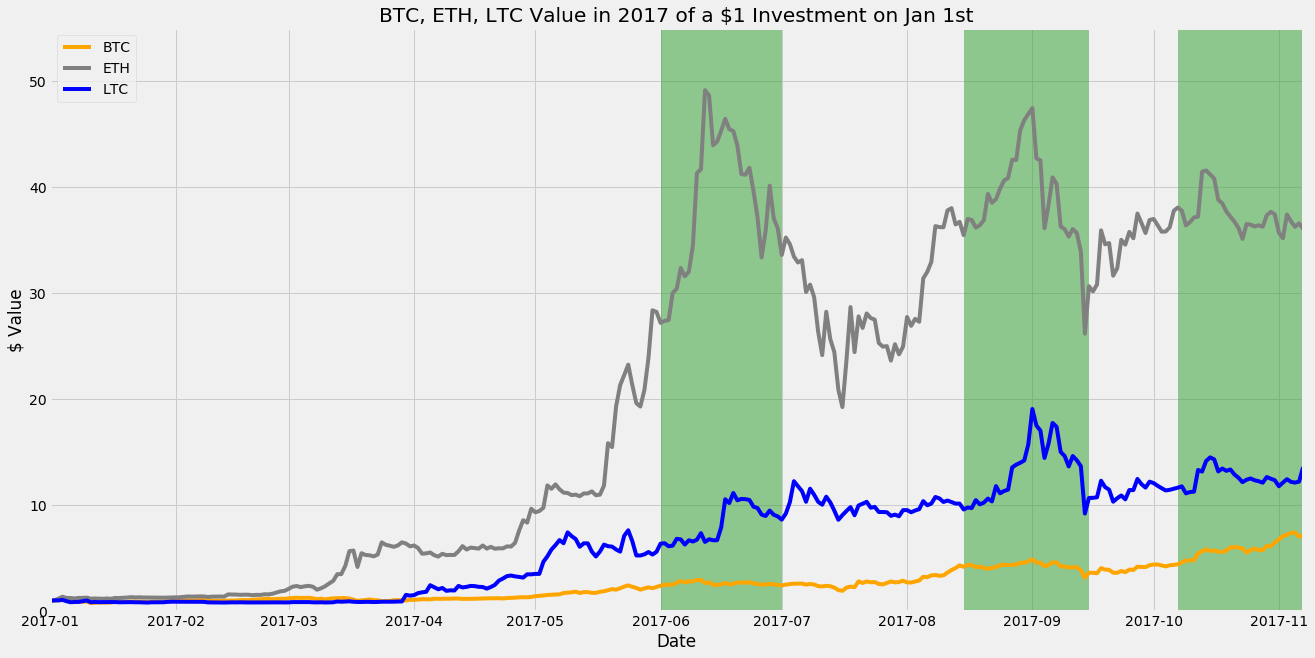

In [294]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot(df['Date'],df['BTC Close normalized 1'], color='orange', label='BTC')
plt.plot(df['Date'],df['ETH Close normalized 1'], color='grey', label='ETH')
plt.plot(df['Date'],df['LTC Close normalized 1'], color='blue', label='LTC')
plt.ylim([0.0, 55.0])
plt.xlabel('Date')
plt.ylabel('$ Value')
plt.title('BTC, ETH, LTC Value in 2017 of a $1 Investment on Jan 1st')
plt.legend(loc='best')
plt.xlim('2017-01-01', '2017-11-07')
plt.axvspan('2017-06-01', '2017-07-01', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-08-15', '2017-09-15', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-10-07', '2017-11-07', facecolor='#2ca02c', alpha=0.5)
plt.show()

### You would have reached near-millionaire status in June if you invested \$20,000 at the beginning of the year in Ethereum!
Assuming an investment of \$20,000 in each of the three cryptocurrencies, here is that that investment would look like over the year:

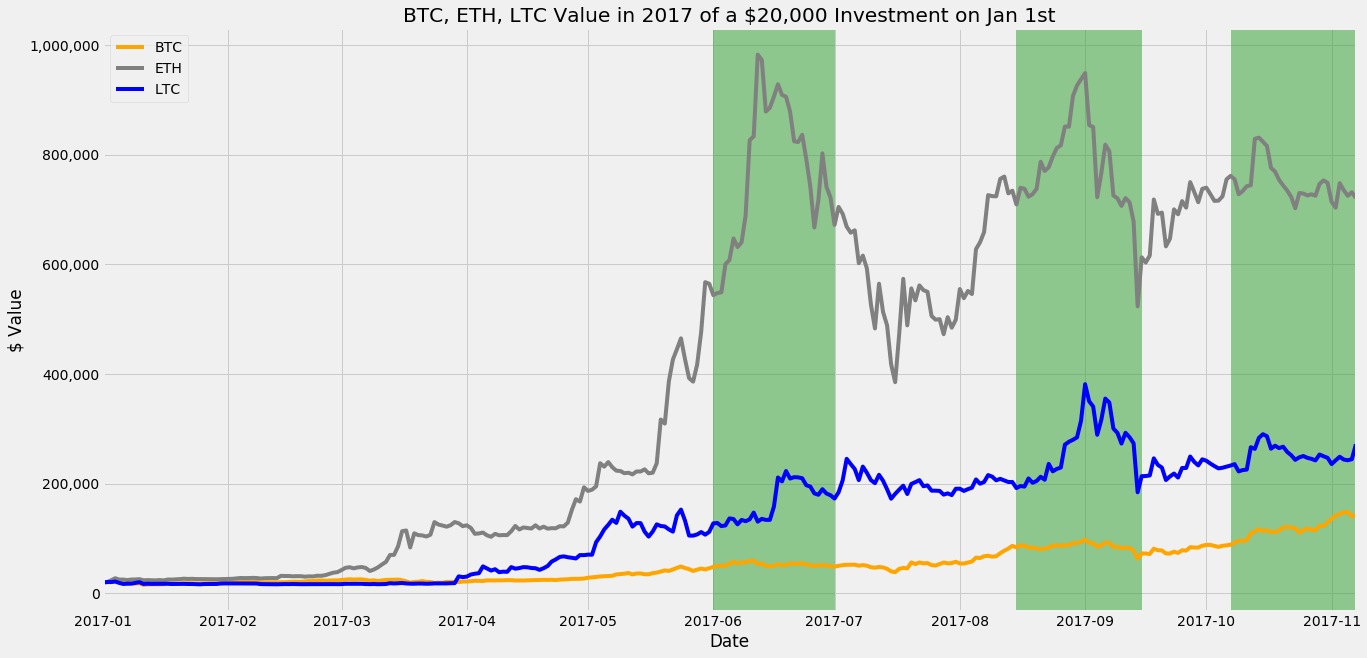

In [295]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot(df['Date'],df['btc_twenty_k_investment'], color='orange', label='BTC')
plt.plot(df['Date'],df['eth_twenty_k_investment'], color='grey', label='ETH')
plt.plot(df['Date'],df['ltc_twenty_k_investment'], color='blue', label='LTC')
plt.xlabel('Date')
plt.ylabel('$ Value')
plt.title('BTC, ETH, LTC Value in 2017 of a $20,000 Investment on Jan 1st')
plt.legend(loc='best')
plt.xlim('2017-01-01', '2017-11-07')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.axvspan('2017-06-01', '2017-07-01', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-08-15', '2017-09-15', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-10-07', '2017-11-07', facecolor='#2ca02c', alpha=0.5)
plt.show()

### Question 2:  Does behavior in one cryptocurrency influence behavior in another?
Spikes in Bitcoin seem to be amplified by spikes in the other 2 currencies, with Ethereum getting the biggest push.  One theory around this is that the prices of the other 2 are cheaper, and thus psychologically more attractive for investors to purchase.  Thus a spike in Bitcoin may lead to investment in the other two.

In the first 2 periods highlighted, it appears that all 3 cryptocurrencies rise, while in the third, Bitcoin seems to spike while the other 2 stay relatively flat.

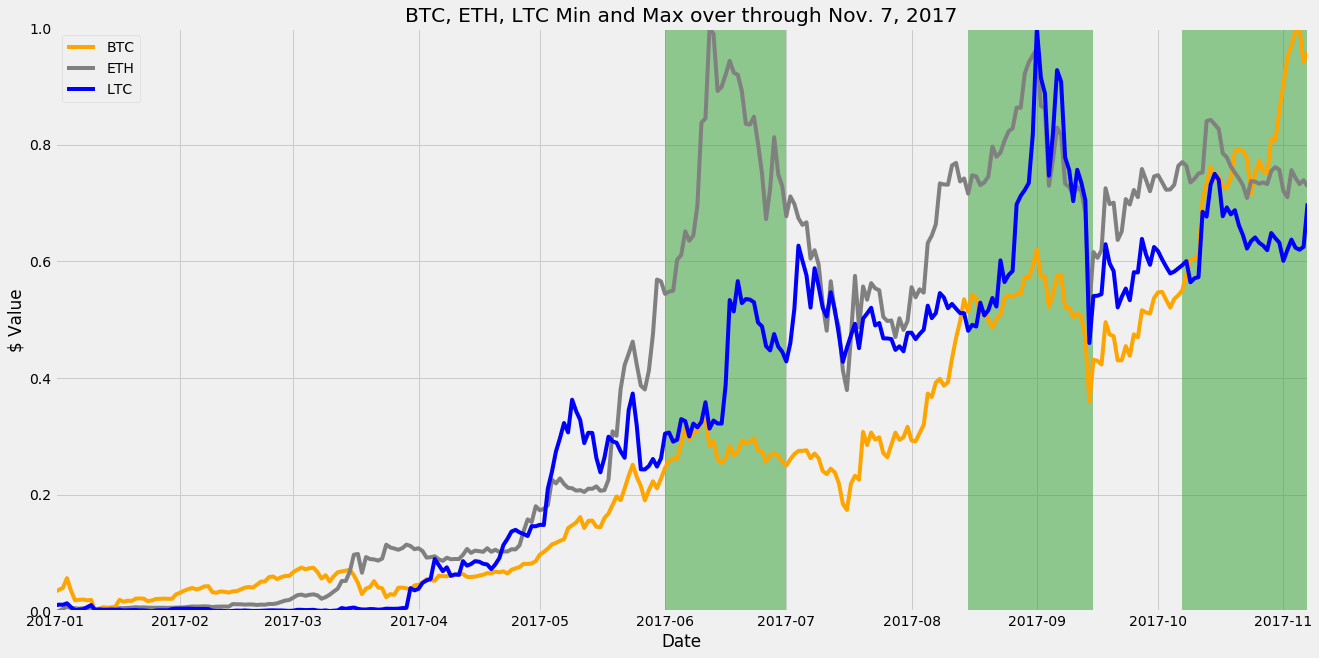

In [296]:
#Plot the data using the second normalization method.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot(df['Date'],df['BTC Close normalized 2'], color='orange', label='BTC')
plt.plot(df['Date'],df['ETH Close normalized 2'], color='grey', label='ETH')
plt.plot(df['Date'],df['LTC Close normalized 2'], color='blue', label='LTC')
plt.ylim([0.0, 1.0])
plt.xlabel('Date')
plt.ylabel('$ Value')
plt.title('BTC, ETH, LTC Min and Max over through Nov. 7, 2017')
plt.legend(loc='best')
plt.xlim('2017-01-01', '2017-11-07')
plt.axvspan('2017-06-01', '2017-07-01', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-08-15', '2017-09-15', facecolor='#2ca02c', alpha=0.5)
plt.axvspan('2017-10-07', '2017-11-07', facecolor='#2ca02c', alpha=0.5)
plt.show()

### Question 3:  Do any patterns emerge when the 3 cryptocurrencies are on the rise (the 3 periods highlighted)?

In [297]:
#function to create lists for candlestick charts
def ohlc(file_name,start_date,end_date):
  '''
    input : file_name with cryptocurrency prices along with start and end date of range for open/high/low/close plot
    output:  list of lists for each date, open, high, low, close, volume  (this then feeds the candlestick_ohlc function from matplotlib.finance)    
  '''
  data_orig = pd.read_csv(file_name, usecols=['Date','Open','High','Low','Close','Volume'], parse_dates=['Date'])  
  data_orig['mdate'] = [mdates.date2num(d) for d in data_orig['Date']]
  mask = (data_orig['Date'] >= start_date) & (data_orig['Date'] <= end_date)
  
  data = data_orig[data_orig.columns[:7]].loc[mask]

  #loop through each date
  x = 0
  y = len(data.index)
  ohlc = []

  while x < y:
    append_me = data['mdate'].iloc[x], data['Open'].iloc[x], data['High'].iloc[x], data['Low'].iloc[x], data['Close'].iloc[x], data['Volume'].iloc[x]
    ohlc.append(append_me)
    x+=1
  
  return ohlc    

In [298]:
#candlestick plotting function
def plot_ohlc(crypto_1,crypto_2,crypto_3,crypto_name_1, crypto_name_2, crypto_name_3,start_date,end_date):

    '''
    input : list of open/high/low/close for 3 cryptocurrencies, along with their names, and date range
    output: candlestick plot for 3 given cryptocurrencies and given date range
    '''
    plt.figure(figsize=(20, 15))
    #ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

    ax1 = plt.subplot2grid((9,1), (0,0), rowspan=2, colspan=1)
    ax2 = plt.subplot2grid((9,1), (3,0), rowspan=2, colspan=1)
    ax3 = plt.subplot2grid((9,1), (6,0), rowspan=2, colspan=1)

    candlestick_ohlc(ax1, crypto_1, width=0.05, colorup='g', colordown='r')
    candlestick_ohlc(ax2, crypto_2, width=0.05, colorup='g', colordown='r')
    candlestick_ohlc(ax3, crypto_3, width=0.05, colorup='g', colordown='r')

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax1.title.set_text(crypto_name_1 + ' ' + start_date + ' - ' + end_date)
    ax2.title.set_text(crypto_name_2 + ' ' + start_date + ' - ' + end_date)
    ax3.title.set_text(crypto_name_3 + ' ' + start_date + ' - ' + end_date)

    plt.show()

In the first period (6/1 - 6/30), Bitcoin's spike emergest first, followed by Ethereum, and then Litecoin.  It appears in June that there is a lag for Ethereum and Litecoin, and longer for Litecoin.

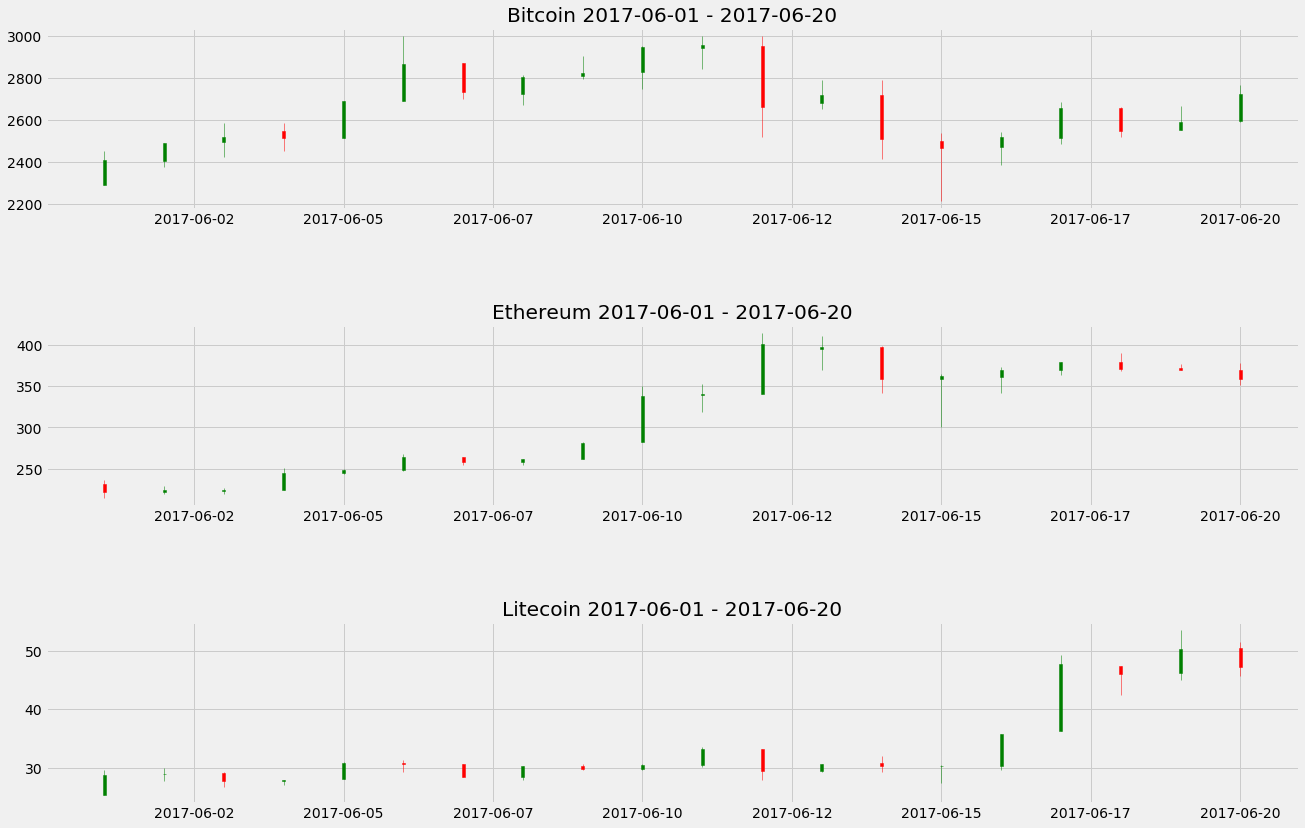

In [299]:
start_date = '2017-06-01'
end_date = '2017-06-20'
ohlc_btc = ohlc('bitcoin_price.csv',start_date, end_date)
ohlc_eth = ohlc('ethereum_price.csv',start_date, end_date)
ohlc_ltc = ohlc('litecoin_price.csv',start_date, end_date)

plot_ohlc(ohlc_btc,ohlc_eth,ohlc_ltc,'Bitcoin','Ethereum','Litecoin',start_date,end_date)

Next, let's look at the second period (8/15 - 9/15).  It looks like the prices mostly rise and fall together with almost no lag.  This could be indicative of the exposure of more cryptocurrencies to a wider population.

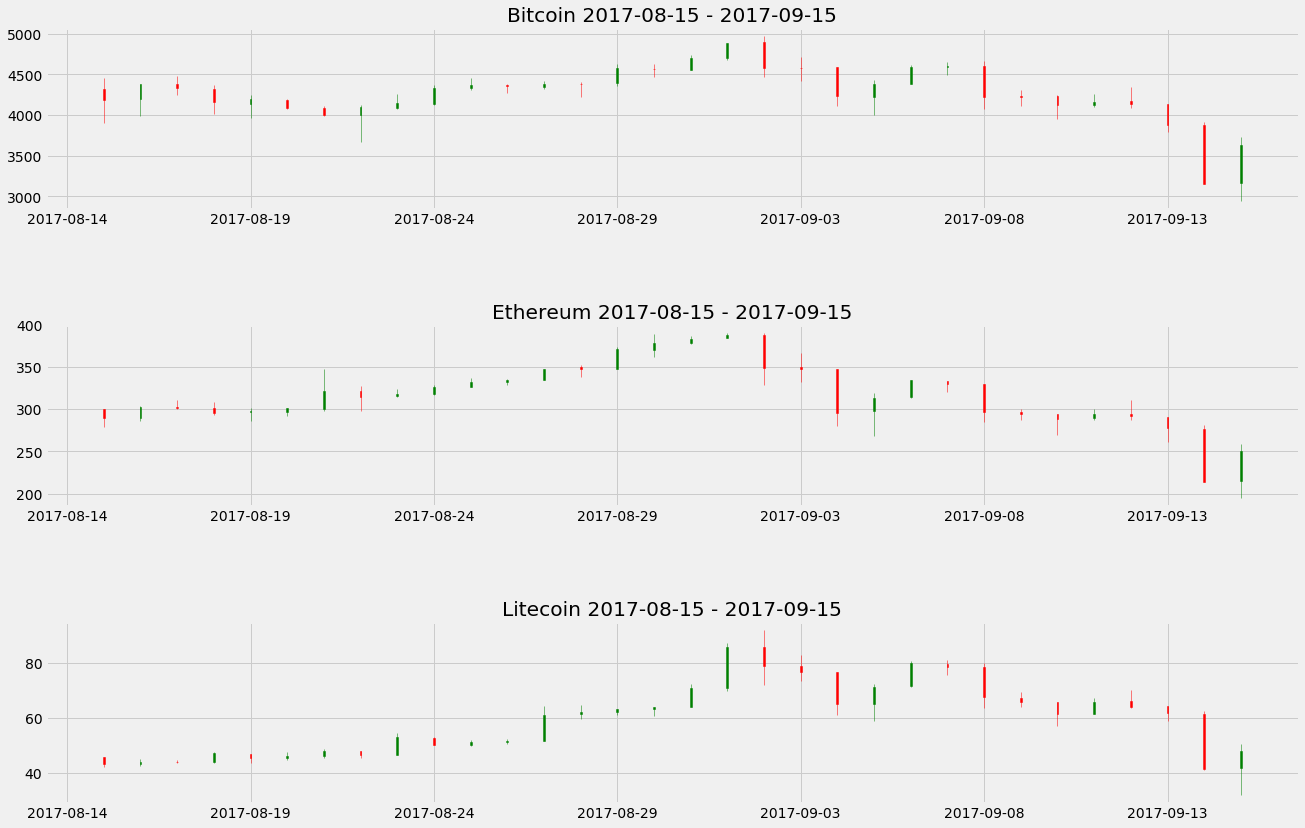

In [300]:
start_date = '2017-08-15'
end_date = '2017-09-15'

ohlc_btc = ohlc('bitcoin_price.csv',start_date, end_date)
ohlc_eth = ohlc('ethereum_price.csv',start_date, end_date)
ohlc_ltc = ohlc('litecoin_price.csv',start_date, end_date)

plot_ohlc(ohlc_btc,ohlc_eth,ohlc_ltc,'Bitcoin','Ethereum','Litecoin',start_date,end_date)

Last, let's look at the third period (10/7 - 11/7).  

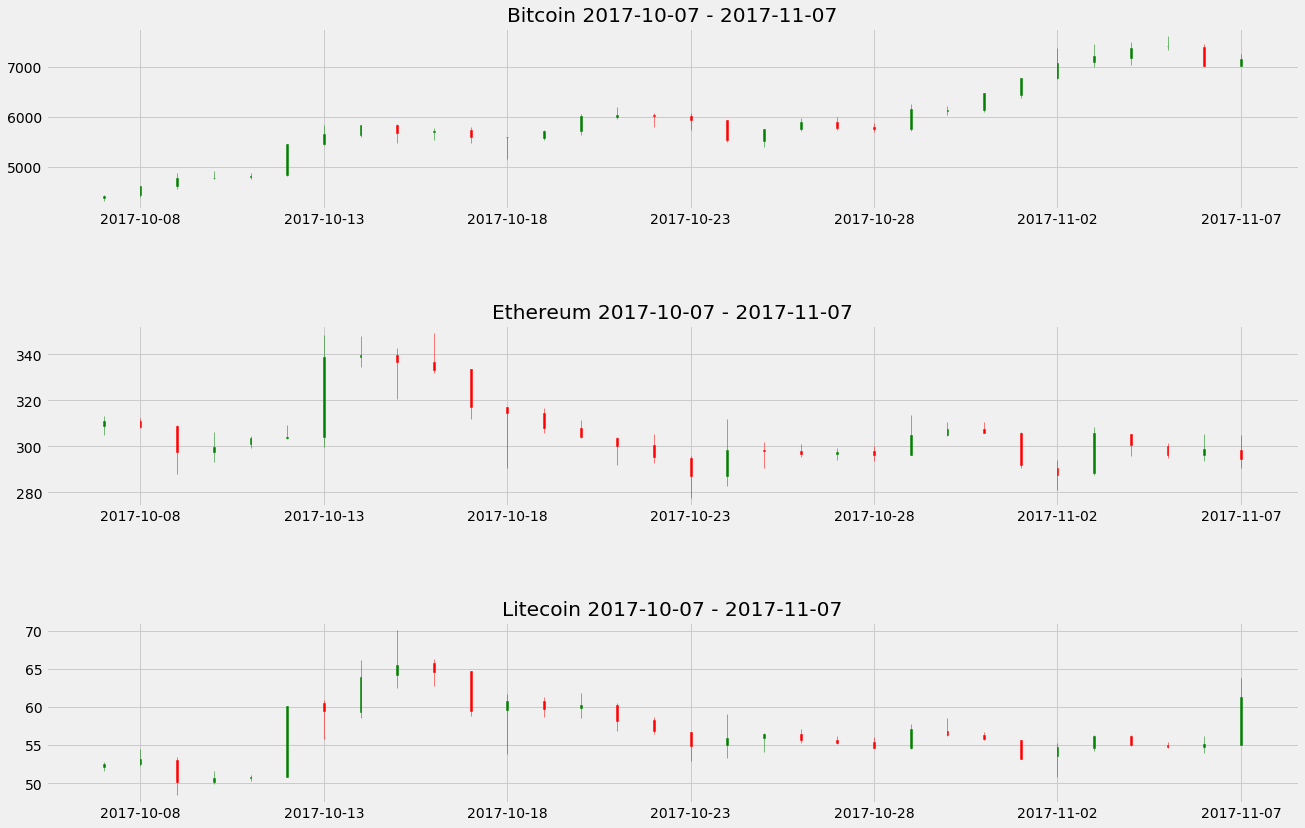

In [301]:
start_date = '2017-10-07'
end_date = '2017-11-07'

ohlc_btc = ohlc('bitcoin_price.csv',start_date, end_date)
ohlc_eth = ohlc('ethereum_price.csv',start_date, end_date)
ohlc_ltc = ohlc('litecoin_price.csv',start_date, end_date)

plot_ohlc(ohlc_btc,ohlc_eth,ohlc_ltc,'Bitcoin','Ethereum','Litecoin',start_date,end_date)

It appears that during the period of 10/28/17 - 11/7/2017 there was a rise in Bitcoin, without a similar rise in Ethereum and Litecoin.  This seems to have represented a good buying opportunity.

It's worth noting that all 3 cryptocurrencies have far surpassed these values as of today, 12/18/2017 at 5:45 PM from coinbase:

Price as of 11/7/2017:
-  BTC:  \$7,247
-  ETH:  \$298
-  LTC:  \$60

Price as of 12/18/2017
-  BTC:  \$18,755
-  ETH:  \$799
-  LTC:  \$351

### Future considerations
There appears to be a strong relationship between the 3 cryptocurrencies offered for sale on Coinbase.  While it's difficult to look at fundamentals as a source of prediction, there appears to be large increases in price due to the migration of traditional assets towards this new asset class.  

Much of the migration has been driven by news and the promise of future gains as the price continues to rise at rates previously unheard of.  Therefore, incorporating analytics around news such as twitter feeds or Google trends may be useful in understanding large swings, and predicting future movements.